In [85]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import pickle

def mahalanobis_dist(vals, cov, real_vals):
    dif = (vals - real_vals)
    return np.sqrt(np.linalg.multi_dot([dif, np.linalg.inv(cov), dif]))

def confidence_ellipse(val, cov, ax, n_std=1.0, facecolor='none', **kwargs):
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = val[0]

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = val[1]

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


In [86]:
path = '/home/tguethle/Documents/spi/Master_Thesis/main_files/spimodfit_comparison_sim_source'
real_vals = [7e-4, -2]
piv = 100

In [87]:
folders = [
    f"{path}/pyspi_real_bkg_para2/0374/pre_ppc",
    #f"{path}/pyspi_real_bkg_Timm2_para2/0374/pre_ppc",
    f"{path}/pyspi_real_bkg_Timm2_para2/0374/pre_ppc_no_rebinning",
    f'{path}/reduced_counts_Timm2/0374/pre_ppc/',
    f"{path}/spimodfit_fits/0374_real_bkg_Timm2_para2",
    f'{path}/reduced_counts_Timm2',
    f"{path}/spimodfit_fits/0374_real_bkg_Timm2_para2/all",
    f'{path}/reduced_counts_Timm2/all',
    #f"{path}/pyspi_real_bkg_Timm2_para2/0374/pre_ppc_no_rebinning_low_energy",

]

d_M = []
for i in range(len(folders)):
    with open(f"{folders[i]}/source_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    d_M.append(mahalanobis_dist(val, cov, real_vals))

names = [
    "PySpi Real Bkg afs Daten",
    #"PySpi Real Bkg spiselect Daten",
    "PySpi Real Bkg spiselect Daten (no rebinning)",
    'Pyspi reduced Real Bkg Timm2',
    "Spimodfit Real Bkg Timm2 (optimized, logL, channles)",
    "Spimodfit reduced Bkg Timm2(optimized, channels)",
    "Spimodfit Real Bkg Timm2",
    "Spimodfit reduced Bkg Timm2",
    # "PySpi Real Bkg Post-PPC",
    #"PySpi Real Bkg spiselect Daten (no rebinning, low energy)",
    # "PySpi SMF Bkg Post-PPC",
    "PySpi Const Bkg Timm2 wide Energy",
    "Spimodfit Real Bkg",
    
]

names = [f"{names[i]}: $d_M$ = {d_M[i]:.3f}" for i in range(len(d_M))]

edgecolors = [
    "C0",
    "C3",
    "C1",
    "C1",
    "C2",
    
    "C1",
    "C2",
]
linestyles = [
    "solid",
    "solid",
    "solid",
    "dotted",
    "dotted",
    "dashed",
    "dashed",
]


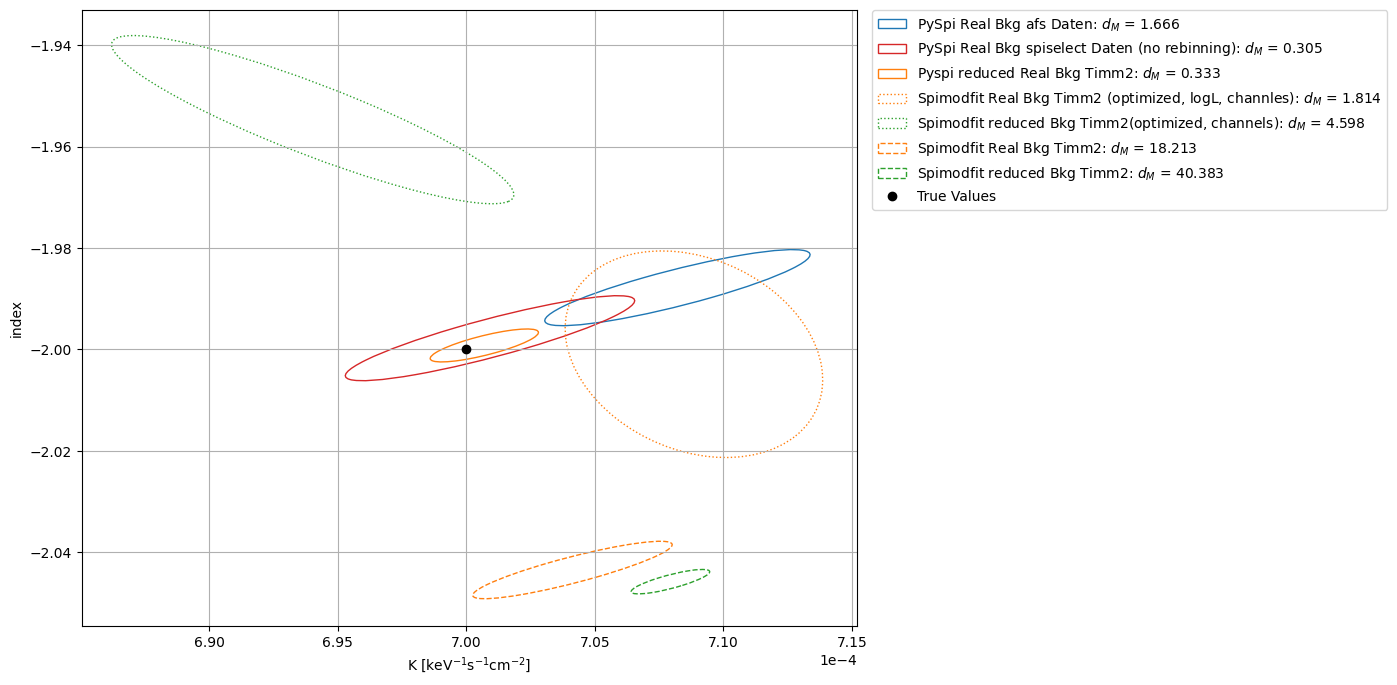

In [88]:
import math

fig, ax = plt.subplots(figsize=(10, 8))
for folder, name, edgecolor, linestyle in zip(folders, names, edgecolors, linestyles):
    with open(f"{folder}/source_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    confidence_ellipse(val, cov, ax, 1, edgecolor=edgecolor, label=name, ls=linestyle)
plt.plot(real_vals[0], real_vals[1], "ko", label="True Values")
ax.autoscale()
ax.grid()
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
#plt.legend()
plt.xlabel("K [keV$^{-1}$s$^{-1}$cm$^{-2}$]")
plt.ylabel("index")
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# For the 10x brighter source and reduced background

In [89]:
path = '/home/tguethle/Documents/spi/Master_Thesis/main_files/spimodfit_comparison_sim_source/'
real_vals_para3 = [7e-3, -2]
piv = 100




folders2 = [
    # f"{path}/pyspi_real_bkg_Timm2_para3/0374/pre_ppc",
    # f"{path}/pyspi_real_bkg_Timm2_para3/0374/pre_ppc_only_low",
    f"{path}/reduced_counts_bright_source/0374/pre_ppc",
    #f"{path}/reduced_counts_bright_source/0374/pre_ppc_30-400",
    #f"{path}/reduced_counts_bright_source/0374/pre_ppc_30-600",
    f"{path}/reduced_counts_bright_source/0374/pre_ppc_20-400",
    f"{path}/reduced_counts_bright_source/",
    

]

names2 = [
    "PySpi Real Bkg ",
   # "PySpi Real Bkg middle Energy",
   # "PySpi Real Bkg high Energy",
    "PySpi Real Bkg low Energy",

    "Spimodfit Real Bkg Timm2",
    # "PySpi Real Bkg Post-PPC",
    "PySpi Real Bkg spiselect Daten (no rebinning, low energy)",
    # "PySpi SMF Bkg Post-PPC",
    "PySpi Const Bkg Timm2 wide Energy",
    "Spimodfit Real Bkg",
    
]

d_M_2 = []
for i in range(len(folders2)):
    with open(f"{folders2[i]}/source_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
        print(val, cov)
    d_M_2.append(mahalanobis_dist(val, cov, real_vals_para3))

names2 = [f"{names2[i]}: $d_M$ = {d_M_2[i]:.3f}" for i in range(len(d_M_2))]


[ 0.00699175 -2.00065605] [[1.64620600e-11 1.73153496e-09]
 [1.73153496e-09 4.70338704e-07]]
[ 0.00695829 -2.00556853] [[1.73921942e-11 1.87446292e-09]
 [1.87446292e-09 4.91142607e-07]]
[ 0.00701053 -1.96268849] [[ 6.77569159e-11 -1.23725243e-08]
 [-1.23725243e-08  3.40099635e-06]]


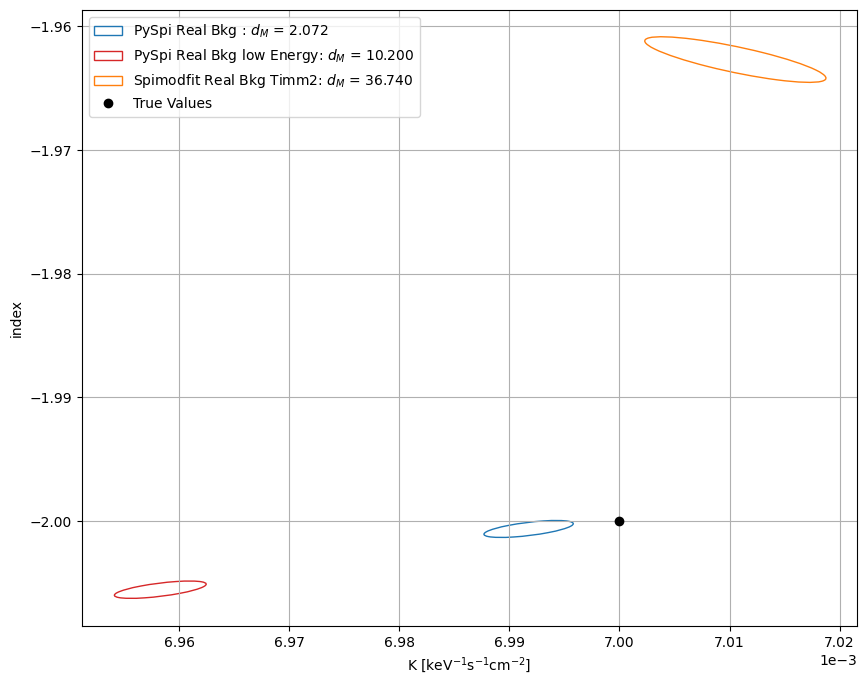

In [90]:
import math

fig, ax = plt.subplots(figsize=(10, 8))
for folder, name, edgecolor, linestyle in zip(folders2, names2, edgecolors, linestyles):
    with open(f"{folder}/source_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    confidence_ellipse(val, cov, ax, 1, edgecolor=edgecolor, label=name, ls=linestyle)
plt.plot(real_vals_para3[0], real_vals_para3[1], "ko", label="True Values")
ax.autoscale()
ax.grid()
#lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.legend()
plt.xlabel("K [keV$^{-1}$s$^{-1}$cm$^{-2}$]")
plt.ylabel("index")
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


In [8]:
#plt.savefig(f"{path}/spimodfit_comparison_combined_plot_Timm_v2.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
#fig.savefig(f"{path}/spimodfit_comparison_Timm2_Crab_like.pdf", bbox_inches='tight')

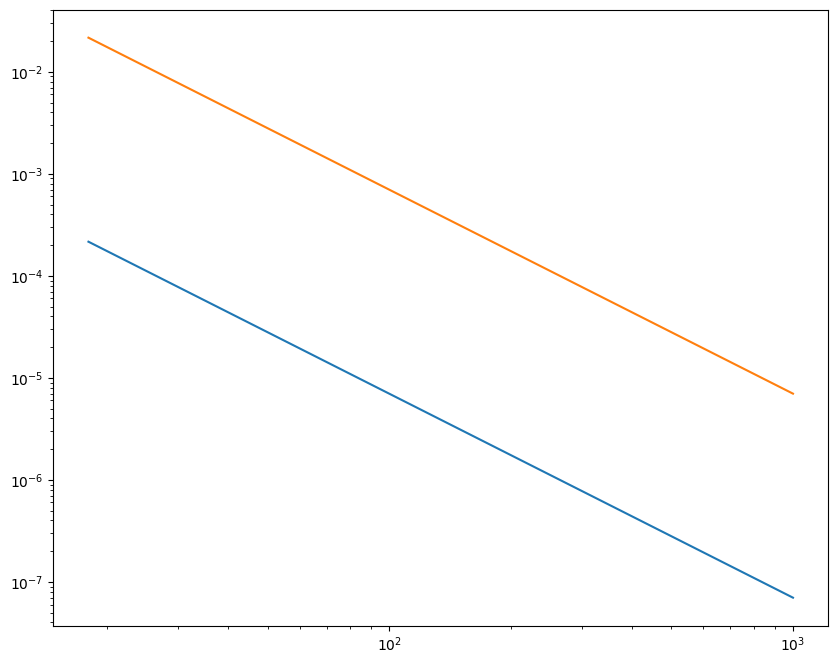

In [10]:
def powerlaw(x, K, index, piv):
    return K * (x/piv)**index

energy = np.linspace(18, 1000, 1000)


fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(energy, powerlaw(energy, 7e-6, -2, piv), label="True Values")
ax.plot(energy, powerlaw(energy, 7e-4, -2, piv), label="True Values")
ax.set_yscale("log")
ax.set_xscale("log")


In [61]:
piv

100